In [40]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt 

In [41]:
data = pd.read_csv('ex2data1.txt',header=None);
n = len(data.iloc[0,:])-1;
m = len(data);
X = data.iloc[:,:n];
y = data.iloc[:,n]

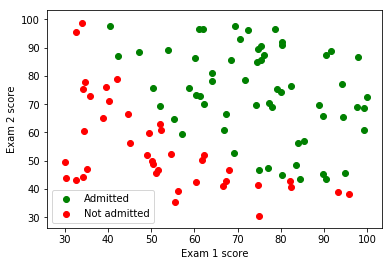

In [42]:
adm =plt.scatter(X[y==1][0],X[y==1][1],color='green')

not_adm = plt.scatter(X[y==0][0],X[y==0][1],color='red')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [43]:
X= np.hstack((np.ones((m,1)),X))

In [44]:
sigmoid = lambda temp:1/(1+np.exp(-temp));

In [45]:
costFunction = lambda X,y,theta: np.sum((y.T).dot(sigmoid(X.dot(theta))) +((1-y).T).dot(1-sigmoid(X.dot(theta))))/(-2*m)

In [46]:
gradientFunction = lambda X,y,theta: (X.T).dot(sigmoid(X.dot(theta))-y)/(-m); 

In [47]:
(m,n) = X.shape

In [48]:
theta = np.zeros((n,1))

In [49]:
J = costFunction( X, y,theta)
print(theta.shape)

(3, 1)


In [33]:
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradientFunction, 
                    args = (X, y.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)

ValueError: shapes (3,) and (100,) not aligned: 3 (dim 0) != 100 (dim 0)